# MC-306 MTE Project
# BUILDING A QUANTITATIVE MOMENTUM INVESTING MODEL USING PYTHON
## Abu Musaddiq Zamani- 2K19/MC/008
## Ankon Bhowmick- 2K19/MC/019

### Importing necessary libraries

In [49]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("MC306_Data.csv")
print(df.head())
print(df.columns)

       Symbol      Open      High       Low  Last Traded Price  Change  \
0    NIFTY 50  18080.60  18095.45  17921.55           17957.40   -96.0   
1  ADANIPORTS    840.00    860.90    826.00             844.05    25.5   
2        NTPC    145.40    150.60    144.75             148.40     4.1   
3   POWERGRID    229.95    234.60    226.90             232.40     5.0   
4        ONGC    170.25    172.75    169.30             171.35     3.3   

   %Change  Traded Volume(lacs)  Traded Value(crs)  52 Week High  52 Week Low  \
0    -0.53              1953.71           17460.94      18604.45     14151.40   
1     3.12               210.91            1785.47        901.00       638.10   
2     2.84               239.59             353.63        152.10        97.05   
3     2.20               128.76             296.31        234.60       148.88   
4     1.96               200.55             343.34        194.95        97.45   

   365 Days % Change  30 Days % Change  
0              22.68       

#### We do not need the row of data about the total of NIFTY 50, so we remove that row.

In [4]:
df=df[1:]
df

,Symbol,Open,High,Low,Last Traded Price,Change,%Change,Traded Volume(lacs),Traded Value(crs),52 Week High,52 Week Low,365 Days % Change,30 Days % Change
1,ADANIPORTS,840.00,860.90,826.00,844.05,25.50,3.12,210.91,1785.47,901.00,638.10,13.72,24.53
2,NTPC,145.40,150.60,144.75,148.40,4.10,2.84,239.59,353.63,152.10,97.05,39.60,14.11
3,POWERGRID,229.95,234.60,226.90,232.40,5.00,2.20,128.76,296.31,234.60,148.88,8.52,9.21
4,ONGC,170.25,172.75,169.30,171.35,3.30,1.96,200.55,343.34,194.95,97.45,65.64,-8.34
5,UPL,791.95,800.65,790.30,795.00,10.65,1.36,23.27,184.90,864.70,581.30,23.02,8.62
6,GRASIM,1688.00,1712.00,1669.55,1702.60,22.90,1.36,12.01,204.05,1929.80,1262.00,17.70,17.70
7,SHREECEM,24720.00,25270.00,24682.50,25100.00,334.95,1.35,0.33,81.78,32048.00,21650.00,-17.32,14.14
8,LT,1840.00,1845.00,1827.00,1832.90,6.55,0.36,17.19,315.50,2078.55,1306.00,30.57,12.14
9,SUNPHARMA,928.00,940.70,924.15,927.90,1.85,0.20,29.12,271.02,940.70,592.75,52.41,12.79
10,TATASTEEL,1348.45,1358.00,1329.25,1344.00,2.10,0.16,63.30,850.15,1534.50,837.15,54.88,4.03


#### Extracting the required columns: 'Symbol', '%Change', '365 Days % Change', '30 Days % Change', 'Price'

In [5]:
df=df.rename(columns={'365 Days % Change':'365Days%Change','30 Days % Change':'30Days%Change','Last Traded Price':'Price'})
df1=df[['Symbol', '%Change', 'Price']]
df1

,Symbol,%Change,Price
1,ADANIPORTS,3.12,844.05
2,NTPC,2.84,148.40
3,POWERGRID,2.20,232.40
4,ONGC,1.96,171.35
5,UPL,1.36,795.00
6,GRASIM,1.36,1702.60
7,SHREECEM,1.35,25100.00
8,LT,0.36,1832.90
9,SUNPHARMA,0.20,927.90
10,TATASTEEL,0.16,1344.00


#### We now select the top 10 stocks on the basis of %change

In [6]:
df1.sort_values('%Change',ascending=False,inplace=True)
df1=df1[:10]
df1

<ipython-input-6-31b62f88a4e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values('%Change',ascending=False,inplace=True)


,Symbol,%Change,Price
1,ADANIPORTS,3.12,844.05
2,NTPC,2.84,148.40
3,POWERGRID,2.20,232.40
4,ONGC,1.96,171.35
5,UPL,1.36,795.00
6,GRASIM,1.36,1702.60
7,SHREECEM,1.35,25100.00
8,LT,0.36,1832.90
9,SUNPHARMA,0.20,927.90
10,TATASTEEL,0.16,1344.00


In [7]:
#Taking portfolio value as input
portfolio=int(input("Enter portfolio value:"))

Enter portfolio value:160000


#### The portfolio will be equally divided into the selected stocks

In [8]:
position_size=int(portfolio/df1.shape[0])

In [9]:
shares=[0 for i in range(df1.shape[0])]
df1['Shares']=shares
df1['Shares']=position_size/df1['Price']
df1[['Symbol','Price','Shares']]

<ipython-input-9-b316696c45f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Shares']=shares
<ipython-input-9-b316696c45f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Shares']=position_size/df1['Price']


,Symbol,Price,Shares
1,ADANIPORTS,844.05,18.956223
2,NTPC,148.40,107.816712
3,POWERGRID,232.40,68.846816
4,ONGC,171.35,93.376131
5,UPL,795.00,20.125786
6,GRASIM,1702.60,9.397392
7,SHREECEM,25100.00,0.637450
8,LT,1832.90,8.729336
9,SUNPHARMA,927.90,17.243237
10,TATASTEEL,1344.00,11.904762


### This model only takes into account the %change in one day. To make a more effective model, we need to make use of two other metrics given by the NIFTY50 index, i.e. %change in 30 days and %change in 365 days.

### However, now that we have 3 metrics instead of 1, we have to find a different way to rank the stocks. To do this, we can find out the percentile scores for all the stocks in each metric, and compute their average.

In [10]:
df2=df[['Symbol', '%Change', '365Days%Change', '30Days%Change','Price']]
df2

,Symbol,%Change,365Days%Change,30Days%Change,Price
1,ADANIPORTS,3.12,13.72,24.53,844.05
2,NTPC,2.84,39.60,14.11,148.40
3,POWERGRID,2.20,8.52,9.21,232.40
4,ONGC,1.96,65.64,-8.34,171.35
5,UPL,1.36,23.02,8.62,795.00
6,GRASIM,1.36,17.70,17.70,1702.60
7,SHREECEM,1.35,-17.32,14.14,25100.00
8,LT,0.36,30.57,12.14,1832.90
9,SUNPHARMA,0.20,52.41,12.79,927.90
10,TATASTEEL,0.16,54.88,4.03,1344.00


### Calculating percentile scores for each stock in each metric.

In [11]:
percentile365=[0 for i in range(df2.shape[0])]
percentile30=[0 for i in range(df2.shape[0])]
percentile1=[0 for i in range(df2.shape[0])]
for i in range(df.shape[0]):
    percentile365[i]=stats.percentileofscore(df2['365Days%Change'],df2['365Days%Change'].iloc[i],kind='weak')
    percentile30[i]=stats.percentileofscore(df2['30Days%Change'],df2['30Days%Change'].iloc[i],kind='weak')
    percentile1[i]=stats.percentileofscore(df2['%Change'],df2['%Change'].iloc[i],kind='weak')
df2['Percentile']=percentile1
df2['365Percentile']=percentile365
df2['30Percentile']=percentile30
df2

<ipython-input-11-de2ea554f3a7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Percentile']=percentile1
<ipython-input-11-de2ea554f3a7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['365Percentile']=percentile365
<ipython-input-11-de2ea554f3a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Symbol,%Change,365Days%Change,30Days%Change,Price,Percentile,365Percentile,30Percentile
1,ADANIPORTS,3.12,13.72,24.53,844.05,100.000,34.375,100.000
2,NTPC,2.84,39.60,14.11,148.40,96.875,65.625,56.250
3,POWERGRID,2.20,8.52,9.21,232.40,93.750,28.125,31.250
4,ONGC,1.96,65.64,-8.34,171.35,90.625,93.750,3.125
5,UPL,1.36,23.02,8.62,795.00,87.500,43.750,28.125
6,GRASIM,1.36,17.70,17.70,1702.60,87.500,40.625,84.375
7,SHREECEM,1.35,-17.32,14.14,25100.00,81.250,3.125,59.375
8,LT,0.36,30.57,12.14,1832.90,78.125,59.375,40.625
9,SUNPHARMA,0.20,52.41,12.79,927.90,75.000,84.375,43.750
10,TATASTEEL,0.16,54.88,4.03,1344.00,71.875,87.500,15.625


### With the percentile scores in hand, we can calculate a new metric which can rank all the stocks, which will be the equal to the arithmetic mean of the three percentile scores. We can call this new metric 'The Momentum Score'.

In [12]:
MomentumScore=[0 for i in range(df2.shape[0])]
df2['MomentumScore']=MomentumScore
for i in range(df2.shape[0]):
    df2['MomentumScore'].iloc[i]=stats.tmean([df2['Percentile'].iloc[i],df2['365Percentile'].iloc[i],df2['30Percentile'].iloc[i]])
df2.sort_values('MomentumScore',ascending=False,inplace=True)
df2

<ipython-input-12-91355fa57af6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MomentumScore']=MomentumScore
C:\Users\ankon\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-12-91355fa57af6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MomentumScore'].ilo

,Symbol,%Change,365Days%Change,30Days%Change,Price,Percentile,365Percentile,30Percentile,MomentumScore
1,ADANIPORTS,3.12,13.72,24.53,844.05,100.000,34.375,100.000,78.125000
2,NTPC,2.84,39.60,14.11,148.40,96.875,65.625,56.250,72.916667
6,GRASIM,1.36,17.70,17.70,1702.60,87.500,40.625,84.375,70.833333
9,SUNPHARMA,0.20,52.41,12.79,927.90,75.000,84.375,43.750,67.708333
11,JSWSTEEL,0.13,41.77,15.15,733.65,68.750,68.750,65.625,67.708333
27,BAJFINANCE,-1.50,48.68,20.46,7378.00,18.750,81.250,90.625,63.541667
4,ONGC,1.96,65.64,-8.34,171.35,90.625,93.750,3.125,62.500000
16,BHARTIARTL,-0.38,44.80,13.25,764.90,53.125,78.125,53.125,61.458333
31,BAJAJFINSV,-2.36,77.08,16.81,16790.00,6.250,100.000,75.000,60.416667
8,LT,0.36,30.57,12.14,1832.90,78.125,59.375,40.625,59.375000


### Picking the top 10 stocks and calcuating their shares.

In [13]:
df2=df2[:10]
shares=[0 for i in range(df2.shape[0])]
df2['Shares']=shares
df2['Shares']=position_size/df2['Price']
df2

<ipython-input-13-50d23668f69a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Shares']=shares
<ipython-input-13-50d23668f69a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Shares']=position_size/df2['Price']


,Symbol,%Change,365Days%Change,30Days%Change,Price,Percentile,365Percentile,30Percentile,MomentumScore,Shares
1,ADANIPORTS,3.12,13.72,24.53,844.05,100.000,34.375,100.000,78.125000,18.956223
2,NTPC,2.84,39.60,14.11,148.40,96.875,65.625,56.250,72.916667,107.816712
6,GRASIM,1.36,17.70,17.70,1702.60,87.500,40.625,84.375,70.833333,9.397392
9,SUNPHARMA,0.20,52.41,12.79,927.90,75.000,84.375,43.750,67.708333,17.243237
11,JSWSTEEL,0.13,41.77,15.15,733.65,68.750,68.750,65.625,67.708333,21.808764
27,BAJFINANCE,-1.50,48.68,20.46,7378.00,18.750,81.250,90.625,63.541667,2.168609
4,ONGC,1.96,65.64,-8.34,171.35,90.625,93.750,3.125,62.500000,93.376131
16,BHARTIARTL,-0.38,44.80,13.25,764.90,53.125,78.125,53.125,61.458333,20.917767
31,BAJAJFINSV,-2.36,77.08,16.81,16790.00,6.250,100.000,75.000,60.416667,0.952948
8,LT,0.36,30.57,12.14,1832.90,78.125,59.375,40.625,59.375000,8.729336


## Final Portfolio

In [14]:
df2[['Symbol','Price','Shares']]

,Symbol,Price,Shares
1,ADANIPORTS,844.05,18.956223
2,NTPC,148.40,107.816712
6,GRASIM,1702.60,9.397392
9,SUNPHARMA,927.90,17.243237
11,JSWSTEEL,733.65,21.808764
27,BAJFINANCE,7378.00,2.168609
4,ONGC,171.35,93.376131
16,BHARTIARTL,764.90,20.917767
31,BAJAJFINSV,16790.00,0.952948
8,LT,1832.90,8.729336


# Using 2-year NIFTY50 to test our model
## Portfolio-1: 01/03/2019, called as Q1
## Portfolio-2: 03/09/2019, called as Q2
## Portfolio-3: 02/03/2020, called as Q3
## Portfolio-4: 01/09/2020, called as Q4
## Year-1= Q1 + Q2
## Year-2= Q3 + Q4

In [15]:
df1=pd.read_csv('Portfolio1.csv')
df2=pd.read_csv('Portfolio2.csv')
df3=pd.read_csv('Portfolio3.csv')
df4=pd.read_csv('Portfolio4.csv')

df1=df1[['Symbol', 'Price', 'YearChange', '6monthChange','MonthChange','Final']]
df2=df2[['Symbol', 'Price', 'YearChange', '6monthChange','MonthChange','Final']]
df3=df3[['Symbol', 'Price', 'YearChange', '6monthChange','MonthChange','Final']]
df4=df4[['Symbol', 'Price', 'YearChange', '6monthChange','MonthChange','Final']]


In [16]:
df3.head()

,Symbol,Price,YearChange,6monthChange,MonthChange,Final
0,ASIANPAINT,1815.1,38.082921,27.107843,6.262242,1899.10
1,AXISBANK,709.3,10.655226,-13.198311,1.366175,496.75
2,BAJAJ-AUTO,2920.0,7.116654,-2.789800,-3.613419,2967.00
3,BAJAJFINSV,9300.0,43.076923,11.913357,7.331620,6190.35
4,BAJFINANCE,4600.0,67.874021,30.053718,5.178529,3487.80


## Momentum-Score Model

In [17]:
def Model2(df):
    percentile365=[0 for i in range(df.shape[0])]
    percentile180=[0 for i in range(df.shape[0])]
    percentile30=[0 for i in range(df.shape[0])]
    for i in range(df.shape[0]):
        percentile365[i]=stats.percentileofscore(df['YearChange'],df['YearChange'].iloc[i],kind='weak')
        percentile180[i]=stats.percentileofscore(df['6monthChange'],df['6monthChange'].iloc[i],kind='weak')
        percentile30[i]=stats.percentileofscore(df['MonthChange'],df['MonthChange'].iloc[i],kind='weak')
    df['percentile365']=percentile365
    df['percentile180']=percentile180
    df['percentile30']=percentile30
    MomentumScore=[0 for i in range(df.shape[0])]
    df['MomentumScore']=MomentumScore
    for i in range(df.shape[0]):
        df['MomentumScore'].iloc[i]=stats.tmean([df['percentile30'].iloc[i],df['percentile180'].iloc[i],df['percentile365'].iloc[i]])
    df.sort_values('MomentumScore',ascending=False,inplace=True)
    df=df.iloc[:10]
    return df

In [18]:
df1=Model2(df1)
df2=Model2(df2)
df3=Model2(df3)
df4=Model2(df4)

C:\Users\ankon\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
df1

,Symbol,Price,YearChange,6monthChange,MonthChange,Final,percentile365,percentile180,percentile30,MomentumScore
1,AXISBANK,713.50,44.170540,32.178585,9.579197,663.90,91.666667,97.916667,100.000000,96.527778
20,ICICIBANK,352.05,20.297283,23.353189,7.047517,409.65,77.083333,91.666667,89.583333,86.111111
42,TITAN,1031.90,62.529532,15.039019,5.049139,1105.10,97.916667,83.333333,77.083333,86.111111
30,NESTLEIND,10640.00,45.156889,7.605722,6.712500,12875.20,93.750000,70.833333,85.416667,83.333333
4,BAJFINANCE,2663.30,37.638243,20.511312,2.514735,3332.50,87.500000,87.500000,64.583333,79.861111
3,BAJAJFINSV,6480.00,11.994469,7.730673,7.290178,7119.55,70.833333,72.916667,91.666667,78.472222
34,RELIANCE,1237.00,50.349438,25.316584,-0.017409,1248.55,95.833333,93.750000,41.666667,77.083333
46,WIPRO,370.90,22.773916,40.226843,0.818452,254.40,85.416667,100.000000,45.833333,77.083333
0,ASIANPAINT,1409.00,13.446055,10.164191,4.816679,1616.20,72.916667,77.083333,75.000000,75.000000
44,UPL,876.10,7.141984,22.909652,2.734375,563.20,68.750000,89.583333,66.666667,75.000000


In [20]:
df2

,Symbol,Price,YearChange,6monthChange,MonthChange,Final,percentile365,percentile180,percentile30,MomentumScore
30,NESTLEIND,12830.00,65.175410,24.563107,1.487618,15778.85,97.916667,93.750000,81.250000,90.972222
4,BAJFINANCE,3303.00,102.018349,37.028356,-2.109827,4465.85,100.000000,100.000000,60.416667,86.805556
20,ICICIBANK,405.05,35.468227,16.897547,1.788235,497.25,87.500000,87.500000,83.333333,86.111111
0,ASIANPAINT,1608.00,41.924095,25.625000,-2.863799,1797.95,91.666667,97.916667,56.250000,81.944444
26,KOTAKBANK,1429.00,31.705069,14.862149,-0.078362,1620.35,83.333333,77.083333,75.000000,78.472222
15,HDFC,2141.00,18.878401,11.258347,2.532835,2175.75,77.083333,68.750000,87.500000,77.777778
36,SHREECEM,18579.00,14.175624,16.027016,1.197230,22670.95,68.750000,85.416667,79.166667,77.777778
3,BAJAJFINSV,7050.00,44.071607,25.623664,-5.984450,9050.75,95.833333,95.833333,39.583333,77.083333
33,POWERGRID,201.40,3.017903,11.578947,6.653901,181.50,62.500000,70.833333,97.916667,77.083333
22,INFY,815.00,-29.883426,21.659949,6.659907,731.70,27.083333,91.666667,100.000000,72.916667


In [21]:
df3

,Symbol,Price,YearChange,6monthChange,MonthChange,Final,percentile365,percentile180,percentile30,MomentumScore
5,BHARTIARTL,534.00,42.400000,47.107438,9.438878,513.10,89.583333,100.000000,91.666667,93.750000
30,NESTLEIND,15950.00,47.154475,35.686942,6.100728,15949.55,95.833333,97.916667,70.833333,88.194444
3,BAJAJFINSV,9300.00,43.076923,11.913357,7.331620,6190.35,91.666667,85.416667,83.333333,86.805556
36,SHREECEM,22810.00,24.286890,9.716210,12.185212,20283.00,81.250000,81.250000,95.833333,86.111111
4,BAJFINANCE,4600.00,67.874021,30.053718,5.178529,3487.80,100.000000,95.833333,60.416667,85.416667
0,ASIANPAINT,1815.10,38.082921,27.107843,6.262242,1899.10,87.500000,93.750000,72.916667,84.722222
10,DRREDDY,2961.00,16.149531,12.331418,5.103516,4264.70,77.083333,87.500000,58.333333,74.305556
15,HDFC,2215.00,13.589744,0.578953,5.962005,1832.60,75.000000,75.000000,68.750000,72.916667
20,ICICIBANK,508.25,55.428135,21.460151,0.553471,394.60,97.916667,91.666667,27.083333,72.222222
26,KOTAKBANK,1631.00,29.753381,8.063341,3.452311,1401.35,83.333333,79.166667,47.916667,70.138889


In [22]:
df4

,Symbol,Price,YearChange,6monthChange,MonthChange,Final,percentile365,percentile180,percentile30,MomentumScore
34,RELIANCE,2100.00,65.870226,33.736666,19.530686,2085.80,97.916667,95.833333,91.666667,95.138889
22,INFY,926.25,28.120894,28.914405,23.809524,1253.30,85.416667,91.666667,97.916667,91.666667
7,BRITANNIA,3735.00,22.821440,22.515253,14.106027,3363.75,81.250000,87.500000,83.333333,84.027778
17,HEROMOTOCO,3030.05,10.950201,31.057526,16.614223,3224.00,70.833333,93.750000,87.500000,84.027778
10,DRREDDY,4271.10,60.086207,47.279310,4.152186,4426.55,95.833333,97.916667,52.083333,81.944444
8,CIPLA,713.55,31.894640,57.795223,5.502145,787.05,89.583333,100.000000,56.250000,81.944444
46,WIPRO,271.00,3.791651,12.752236,19.533214,410.30,62.500000,77.083333,93.750000,77.777778
0,ASIANPAINT,1925.00,38.116592,10.609935,6.871096,2277.20,91.666667,72.916667,64.583333,76.388889
19,HINDUNILVR,2149.95,26.022860,6.962687,10.562181,2132.05,83.333333,68.750000,75.000000,75.694444
4,BAJFINANCE,3517.00,29.068957,-13.160494,27.571429,5264.90,87.500000,37.500000,100.000000,75.000000


### Function to find top 10 stocks

In [23]:
def CalcPortfolio(df,value):
    shares=[0 for i in range(df.shape[0])]
    df['Shares']=shares
    df['Shares']=(value/df.shape[0])/df['Price']
    return df

### Function to calculate shares of each stock to be bought

In [24]:
def CalcValue(df):
    value=df[['Final','Shares']].product(axis=1).sum(axis=0)
    return value

In [38]:
start_value=160000
value=[160000,0,0,0,0]
df1=CalcPortfolio(df1,value[0])
value[1]=CalcValue(df1)
df2=CalcPortfolio(df2,value[1])
value[2]=CalcValue(df2)
df3=CalcPortfolio(df3,value[2])
value[3]=CalcValue(df3)
df4=CalcPortfolio(df4,value[3])
value[4]=CalcValue(df4)

In [65]:
df1[['Symbol','Price','MomentumScore','Shares']]

,Symbol,Price,MomentumScore,Shares
1,AXISBANK,713.50,96.527778,22.424667
20,ICICIBANK,352.05,86.111111,45.448090
42,TITAN,1031.90,86.111111,15.505378
30,NESTLEIND,10640.00,83.333333,1.503759
4,BAJFINANCE,2663.30,79.861111,6.007585
3,BAJAJFINSV,6480.00,78.472222,2.469136
34,RELIANCE,1237.00,77.083333,12.934519
46,WIPRO,370.90,77.083333,43.138312
0,ASIANPAINT,1409.00,75.000000,11.355571
44,UPL,876.10,75.000000,18.262755


In [66]:
df2[['Symbol','Price','MomentumScore','Shares']]

,Symbol,Price,MomentumScore,Shares
30,NESTLEIND,12830.00,90.972222,1.273292
4,BAJFINANCE,3303.00,86.805556,4.945910
20,ICICIBANK,405.05,86.111111,40.331661
0,ASIANPAINT,1608.00,81.944444,10.159415
26,KOTAKBANK,1429.00,78.472222,11.432008
15,HDFC,2141.00,77.777778,7.630238
36,SHREECEM,18579.00,77.777778,0.879291
3,BAJAJFINSV,7050.00,77.083333,2.317211
33,POWERGRID,201.40,77.083333,81.113899
22,INFY,815.00,72.916667,20.044588


In [67]:
df3[['Symbol','Price','MomentumScore','Shares']]

,Symbol,Price,MomentumScore,Shares
5,BHARTIARTL,534.00,93.750000,34.816631
30,NESTLEIND,15950.00,88.194444,1.165648
3,BAJAJFINSV,9300.00,86.805556,1.999148
36,SHREECEM,22810.00,86.111111,0.815085
4,BAJFINANCE,4600.00,85.416667,4.041757
0,ASIANPAINT,1815.10,84.722222,10.243006
10,DRREDDY,2961.00,74.305556,6.278987
15,HDFC,2215.00,72.916667,8.393716
20,ICICIBANK,508.25,72.222222,36.580582
26,KOTAKBANK,1631.00,70.138889,11.399191


In [68]:
df4[['Symbol','Price','MomentumScore','Shares']]

,Symbol,Price,MomentumScore,Shares
34,RELIANCE,2100.00,95.138889,8.165827
22,INFY,926.25,91.666667,18.513616
7,BRITANNIA,3735.00,84.027778,4.591228
17,HEROMOTOCO,3030.05,84.027778,5.659391
10,DRREDDY,4271.10,81.944444,4.014946
8,CIPLA,713.55,81.944444,24.032285
46,WIPRO,271.00,77.777778,63.277627
0,ASIANPAINT,1925.00,76.388889,8.908175
19,HINDUNILVR,2149.95,75.694444,7.976110
4,BAJFINANCE,3517.00,75.000000,4.875814


In [53]:
portfolio_dates=['01/03/2019','30/08/2019','28/02/2020','31/08/2020','26/02/2021']

In [39]:
print("Portfolio Values:\n30/08/2019:", value[1],"\n28/02/2020:",value[2],"\n31/08/2020:",value[3],"\n26/02/2021:",value[4])

Portfolio Values:
30/08/2019: 163363.39312720508 
28/02/2020: 185920.810003979 
31/08/2020: 171482.3686179734 
26/02/2021: 199536.62882688048


### Half-yearly and Yearly return

In [43]:
def portfolio_return(a,b):
    return (b-a)/a*100;

In [60]:
#Half-yearly returns
half_return=[]
for i in range(1,len(value)):
    half_return.append(portfolio_return(value[i-1],value[i]))
print("HY1 return:",half_return[0])
print("HY2 return:",half_return[1])
print("HY3 return:",half_return[2])
print("HY4 return:",half_return[3])

HY1 return: 2.102120704503177
HY2 return: 13.808122153296159
HY3 return: -7.7659092522760504
HY4 return: 16.359851123473838


In [45]:
#Yearly returns
year_return=[]
for i in range(2,len(value),2):
    year_return.append(portfolio_return(value[i-2],value[i]))
print("Y1 return:",year_return[0])
print("Y2 return:",year_return[1])

Y1 return: 16.200506252486864
Y2 return: 7.323450679141347


In [47]:
#Overall return
total_return=portfolio_return(value[0],value[4])
print("Total return:",total_return)

Total return: 24.7103930168003


## Illustrations

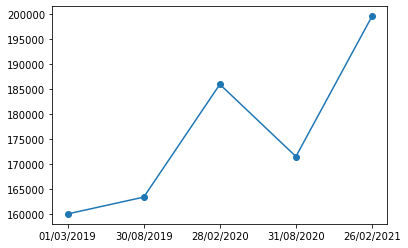

In [59]:
plt.plot(portfolio_dates,value,marker='o',ls='-')
plt.show()

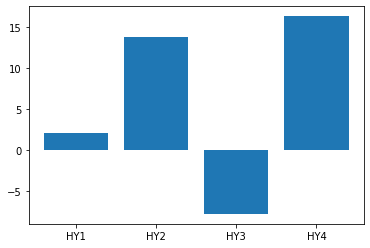

In [63]:
plt.bar(['HY1','HY2','HY3','HY4'],half_return)
plt.show()

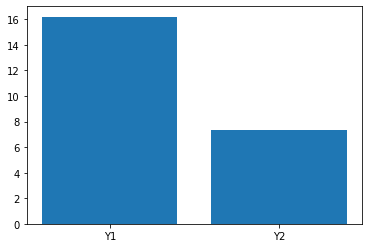

In [70]:
plt.bar(['Y1','Y2'],year_return)
plt.show()